<a href="https://colab.research.google.com/github/jmhuer/shift_invariant_dictionary_learning/blob/main/trace_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install skorch
!pip install tqdm
!git clone https://github.com/jmhuer/optimization_tools
!pip install alphacsc

from optimization_tools.utils import download_gdrive
data = '1BcbMFSk-dyoBaEvV1Wb9Z00f3j5iCp0G' ##google drive id of excell 
download_gdrive(data)

     |████████████████████████████████| 133kB 5.4MB/s 
Cloning into 'optimization_tools'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 46 (delta 12), reused 39 (delta 8), pack-reused 0
Unpacking objects: 100% (46/46), done.
     |████████████████████████████████| 5.6MB 4.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.0MB 35.9MB/s 
  Created wheel for alphacsc: filename=alphacsc-0.2.2-cp37-cp37m-linux_x86_64.whl size=1608556 sha256=73283005b59de1baf39cf96c45120bfd43fdffffa95103d02ebcdb24421c0d30
  Stored in directory: /root/.cache/pip/wheels/8f/71/0c/11c3ce44f8aea6ac3ef4a1f2c92044ad3b914a143ecd70673d
Successfully built alphacsc
Downloading...
From: https://drive.google.com/uc?id=1BcbMFSk-dyoBaEvV1Wb9Z00f3j5iCp0G
To: /content/Trace_TRAIN.xlsx
100%|##########|

In [3]:
import pandas as pd

def open_excel(filename):
    excell = pd.ExcelFile(filename)
    excell.sheet_names
    df = excell.parse("Trace_TRAIN")
    df.columns = df.columns.map(str)
    df = df.dropna().reset_index(drop=True)
    return df

df = open_excel("/content/Trace_TRAIN.xlsx")



In [4]:
df.head()

,class,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275
0,1,0.544070,0.657863,0.611239,0.545413,0.532156,0.593013,0.595280,0.538277,0.563429,0.595956,0.632915,0.584646,0.623187,0.605955,0.590372,0.627021,0.613486,0.623053,0.546018,0.641136,0.549395,0.610697,0.577974,0.635666,0.574218,0.606361,0.638053,0.640597,0.605811,0.654865,0.629337,0.673546,0.640830,0.671068,0.595392,0.589426,0.615870,0.667038,0.603801,...,0.535555,0.549415,0.553527,0.595383,0.534560,0.530545,0.611951,0.586050,0.545310,0.550911,0.563941,0.609545,0.536540,0.590553,0.553134,0.588189,0.533342,0.587944,0.582966,0.598148,0.600321,0.566576,0.671940,0.621281,0.555147,0.581241,0.674639,0.576070,0.637210,0.578224,0.588226,0.577886,0.598069,0.583695,0.602877,0.554263,0.514147,0.603773,0.596331,0.583224
1,2,0.766430,0.624632,0.742247,0.668222,0.766118,0.730685,0.655109,0.729330,0.723651,0.702818,0.756168,0.700417,0.682309,0.708943,0.706622,0.778818,0.749618,0.726770,0.792716,0.725157,0.734037,0.694982,0.721097,0.701277,0.690254,0.788261,0.768237,0.746194,0.687589,0.758755,0.699319,0.750457,0.726326,0.694260,0.671178,0.686930,0.788316,0.719950,0.680735,...,0.586372,0.650994,0.541378,0.620977,0.652756,0.623149,0.565725,0.620713,0.614279,0.612488,0.642426,0.641729,0.638557,0.695148,0.705268,0.687303,0.638555,0.639824,0.708262,0.689973,0.673745,0.686266,0.630369,0.730462,0.653003,0.684052,0.632683,0.655812,0.662756,0.667639,0.686194,0.684996,0.654007,0.689981,0.641813,0.672799,0.616731,0.722182,0.667856,0.724446
2,4,-2.045012,-2.091677,-2.077637,-2.033517,-1.990173,-2.057709,-2.012843,-2.050970,-2.055316,-2.076010,-1.999980,-2.013139,-2.049388,-2.056752,-2.045495,-2.060434,-2.079692,-2.062318,-2.027598,-2.024666,-2.008915,-2.000085,-2.057291,-2.090395,-2.047930,-1.987311,-2.073722,-2.029291,-2.014326,-2.044624,-2.051261,-2.020219,-2.031391,-1.998188,-2.010287,-2.032656,-2.032031,-2.006168,-2.016985,...,0.493962,0.556065,0.527387,0.523516,0.506504,0.547994,0.574566,0.588736,0.602906,0.546851,0.501095,0.616128,0.571765,0.566062,0.560358,0.546953,0.540602,0.538203,0.585792,0.549101,0.579882,0.579662,0.496337,0.554813,0.527310,0.499807,0.526982,0.539348,0.551715,0.525001,0.555466,0.524429,0.485412,0.550532,0.597550,0.606428,0.522934,0.524287,0.547425,0.570562
3,3,-1.705022,-1.739124,-1.725659,-1.801718,-1.742543,-1.760366,-1.691572,-1.687520,-1.761512,-1.774840,-1.782149,-1.764989,-1.737733,-1.688573,-1.748404,-1.725181,-1.776820,-1.780200,-1.745272,-1.733030,-1.764959,-1.758428,-1.755384,-1.804809,-1.742798,-1.752446,-1.774353,-1.762273,-1.683240,-1.758454,-1.709734,-1.776999,-1.742434,-1.746381,-1.750058,-1.714732,-1.754927,-1.769457,-1.788017,...,0.607473,0.588973,0.570474,0.634024,0.573570,0.631004,0.642163,0.622607,0.664910,0.666991,0.634284,0.630291,0.669198,0.589805,0.665064,0.618162,0.628450,0.582156,0.572621,0.585815,0.628583,0.661433,0.619605,0.669750,0.618258,0.608681,0.647773,0.609381,0.636749,0.614242,0.649280,0.640694,0.625991,0.616215,0.616879,0.656518,0.595992,0.601644,0.656164,0.582259
4,1,0.541372,0.571908,0.562147,0.520951,0.527494,0.60404

In [5]:
Y_columns = ["class"]

for index, row in df.iterrows():
    print(row["class"], row[1:-1])
    break

1.0 Unnamed: 1      0.544070
Unnamed: 2      0.657863
Unnamed: 3      0.611239
Unnamed: 4      0.545413
Unnamed: 5      0.532156
                  ...   
Unnamed: 270    0.602877
Unnamed: 271    0.554263
Unnamed: 272    0.514147
Unnamed: 273    0.603773
Unnamed: 274    0.596331
Name: 0, Length: 274, dtype: float64


## Dictionary learning

In [6]:
n_times_atom = 100  # L
n_times = df.shape[1] - 1  # T
n_atoms = 5  # K
n_trials = df.shape[0]  # N
n_channels = 1



In [7]:
X = df.values[0:,1:][:,None,:]
print(X.shape)

(100, 1, 275)


In [8]:
n_iter_global = 10
n_iter_optim = 50
n_iter_mcmc = 100
n_burnin_mcmc = 50

[BatchCDL] Max value for lambda: 3.145698173269431
[BatchCDL] CD iterations 0 / 60
[BatchCDL] lambda = 3.146e-01
[BatchCDL] sparsity: 1.643e-01
[BatchCDL] Objective (z) : 9.021e+03
[Update D] update did not converge
[Update D]: 300 iterations
[BatchCDL] Objective (d) : 4.299e+03
[BatchCDL] CD iterations 1 / 60
[BatchCDL] lambda = 3.146e-01
[BatchCDL] sparsity: 2.137e-01
[BatchCDL] Objective (z) : 2.858e+03
[Update D] update did not converge
[Update D]: 300 iterations
[BatchCDL] Objective (d) : 2.602e+03
[BatchCDL] CD iterations 2 / 60
[BatchCDL] lambda = 3.146e-01
[BatchCDL] sparsity: 2.184e-01
[BatchCDL] Objective (z) : 2.401e+03
[Update D] update did not converge
[Update D]: 300 iterations
[BatchCDL] Objective (d) : 2.257e+03
[BatchCDL] CD iterations 3 / 60
[BatchCDL] lambda = 3.146e-01
[BatchCDL] sparsity: 2.206e-01
[BatchCDL] Objective (z) : 2.127e+03
[Update D] update did not converge
[Update D]: 300 iterations
[BatchCDL] Objective (d) : 2.024e+03
[BatchCDL] CD iterations 4 / 60
[

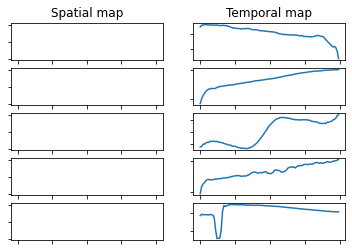

In [15]:

# Learn a dictionary with batch algorithm and rank1 constraints.
cdl = BatchCDL(n_atoms, n_times_atom, rank1=False)
cdl.fit(X)

# Display the learned atoms
fig, axes = plt.subplots(n_atoms, 2, num="Dictionary")
for k in range(n_atoms):
    axes[k, 0].plot(cdl.u_hat_[k])
    # print(cdl.u_hat_[k].shape, cdl.u_hat_[k])
    axes[k, 1].plot(cdl.v_hat_[k])

axes[0, 0].set_title("Spatial map")
axes[0, 1].set_title("Temporal map")
for ax in axes.ravel():
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

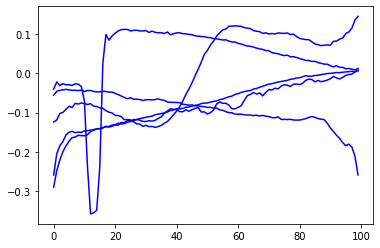

NameError: ignored

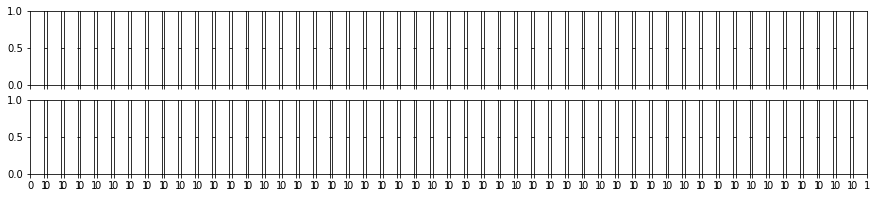

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(cdl.v_hat_.T, 'b', label=r'$\alpha$CSC')
plt.show()


# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(2, n_trials // 2, sharex=True, sharey=True,
#                          figsize=(15, 3))
# axes = axes.ravel()
# for ax, w_start in zip(axes, window_starts):
#     ax.plot(X[w_start:w_start + n_times_atom])

In [ ]:
print(d_hat.shape)